In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler # Z-score variables
from sklearn.metrics import mean_squared_error, r2_score # model evaluation

%matplotlib inline

### Standardizing the Variables

In [2]:
hw = pd.read_csv('https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heightWeight.csv')

In [3]:
hw.head()

,height,weight,diet,age
0,161.187053,88.454144,meat,60
1,178.692677,101.895004,meat,50
2,176.647599,97.503690,meat,61
3,205.353240,121.129281,meat,14
4,200.516263,117.490528,meat,44


In [4]:
# only standardize variables that are numeric

zScore = StandardScaler()

zScore.fit(hw[['height', 'age']])

hw[['height', 'age']] = zScore.transform(hw[['height', 'age']])

In [5]:
hw.head()

,height,weight,diet,age
0,-0.957134,88.454144,meat,0.697371
1,0.205852,101.895004,meat,0.183086
2,0.069987,97.503690,meat,0.748800
3,1.977046,121.129281,meat,-1.668343
4,1.655701,117.490528,meat,-0.125486


### Amazon Books (sklearn)

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt', sep='\t')

In [7]:
df.head()

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4


In [8]:
df.isnull().sum()

Title           0
Author          1
List Price      1
Amazon Price    0
Hard/ Paper     0
NumPages        2
Publisher       1
Pub year        1
ISBN-10         0
Height          4
Width           5
Thick           1
Weight (oz)     9
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Title           0
Author          0
List Price      0
Amazon Price    0
Hard/ Paper     0
NumPages        0
Publisher       0
Pub year        0
ISBN-10         0
Height          0
Width           0
Thick           0
Weight (oz)     0
dtype: int64

### Explore

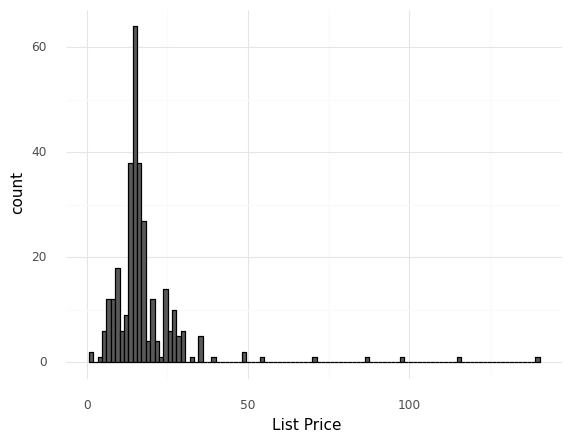

<ggplot: (8781256756429)>

In [13]:
(ggplot(df, aes('List Price')) + geom_histogram(color = 'black') + theme_minimal())

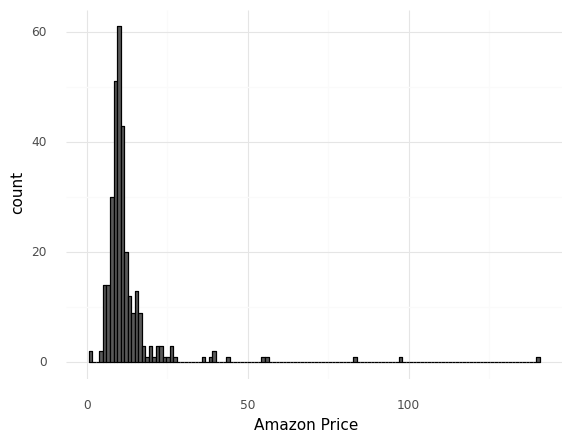

<ggplot: (8781257192855)>

In [14]:
(ggplot(df, aes('Amazon Price')) + geom_histogram(color = 'black') + theme_minimal())

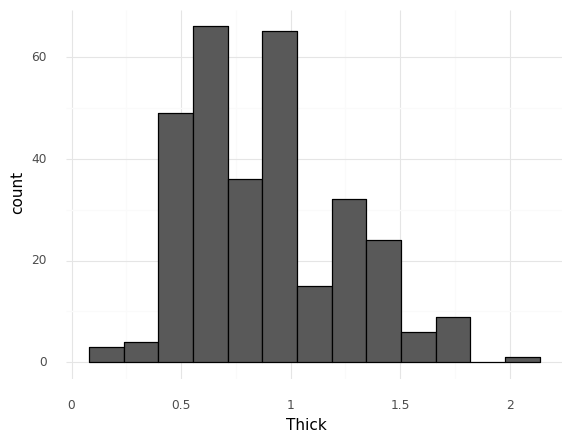

<ggplot: (8781258045413)>

In [21]:
(ggplot(df, aes('Thick')) + geom_histogram(color = 'black') + theme_minimal())

In [22]:
predictors = ['List Price', 'NumPages', 'Weight (oz)', 'Thick', 'Height', 'Width']

X = df[predictors]
y = df['Amazon Price']

In [23]:
zScore = StandardScaler()
zScore.fit(X)
Xz = zScore.transform(X)

In [24]:
X.head()

,List Price,NumPages,Weight (oz),Thick,Height,Width
0,12.95,304.0,11.2,0.8,7.8,5.5
1,15.00,273.0,7.2,0.7,8.4,5.5
2,1.50,96.0,4.0,0.3,8.3,5.2
3,15.99,672.0,28.8,1.6,8.8,6.0
4,30.50,720.0,22.4,1.4,8.0,5.2


In [26]:
Xz

array([[-0.37574164, -0.16740519, -0.18569039, -0.25354952, -0.38152697,
        -0.06344209],
       [-0.22120902, -0.36266722, -0.79067221, -0.53527121,  0.31013011,
        -0.06344209],
       [-1.23886289, -1.47755041, -1.27465766, -1.66215798,  0.19485393,
        -0.41887065],
       ...,
       [-0.37574164, -0.6713072 , -0.91166857, -0.53527121, -0.15097461,
        -0.18191827],
       [ 5.99778689,  0.94117923,  0.29829507,  0.02817217,  2.96148221,
         3.96474825],
       [-0.0711993 ,  0.08454582,  0.5402878 ,  0.30989386, -0.38152697,
        -0.53734683]])

In [27]:
LR_Model = LinearRegression()

In [28]:
LR_Model.fit(Xz, y)

LinearRegression()

### Model Evaluation

In [29]:
price_pred = LR_Model.predict(Xz)
price_pred[1:10]

array([10.91587503,  0.64596322,  7.87491152, 21.75388566, 18.09350432,
       13.26001981, 10.59729274, 21.43797602,  9.48174291])

In [30]:
mean_squared_error(y, price_pred)

10.61233860175146

In [31]:
r2_score(y, price_pred)

0.9205886088486431

### Assumption Checks

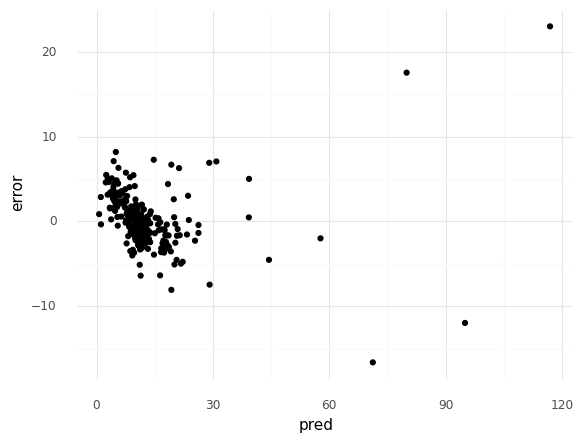

<ggplot: (8781257966333)>

In [32]:
# make residual plot

assump = pd.DataFrame({'error': y - price_pred, 'pred': price_pred})

(ggplot(assump, aes(x = 'pred', y = 'error')) + geom_point() + theme_minimal())
# what are we looking for? Heteroskedasticity and linearity

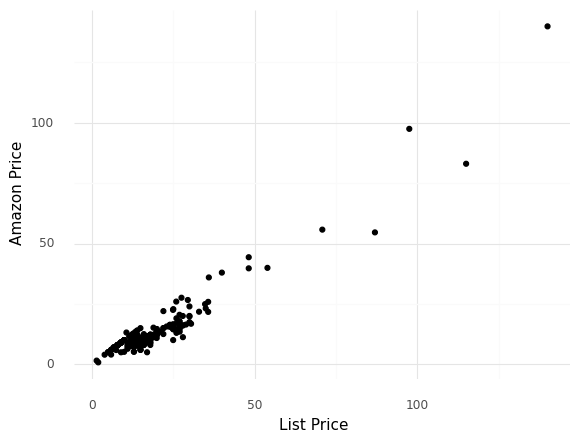

<ggplot: (8781257933394)>

In [34]:
(ggplot(df, aes(x = 'List Price', y = 'Amazon Price')) + geom_point() + theme_minimal())

In [35]:
coefficients = pd.DataFrame({'Coef': LR_Model.coef_, 'Name': predictors})
coefficients = coefficients.append({'Coef': LR_Model.intercept_, 'Name': 'intercept'},
                                  ignore_index = True)

In [36]:
coefficients

# as list price increases by 1 standard deviation, the amazon price increases by 11.4 dollars

# when all of the predictor variables are zero, 12.58 is the amazon price that we expect

,Coef,Name
0,11.401887,List Price
1,0.231519,NumPages
2,-0.419686,Weight (oz)
3,-1.159632,Thick
4,-0.098886,Height
5,-0.197179,Width
6,12.587645,intercept


### Predict

In [40]:
newbook = np.array([12.45, 300, 10, 0.8, 8, 5]).reshape(1, -1)
newbook

array([[ 12.45, 300.  ,  10.  ,   0.8 ,   8.  ,   5.  ]])

In [41]:
newbookz = zScore.transform(newbook)

In [42]:
LR_Model.predict(newbookz)

# this is the predicted price

array([8.42151431])

In [43]:
newbookz

array([[-0.41343253, -0.19260029, -0.36718493, -0.25354952, -0.15097461,
        -0.65582302]])

In [44]:
newbook_inter = np.append(newbookz, 1) # add intercept
newbook_inter

array([-0.41343253, -0.19260029, -0.36718493, -0.25354952, -0.15097461,
       -0.65582302,  1.        ])

In [46]:
np.sum(newbook_inter * coefficients['Coef'])

8.421514307944573

### Beyonce (sklearn)

In [53]:
b = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Beyonce_data.csv")
b.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Beyoncé,0.386,0.28800,1,-18.513,1,0.0602,0.533,0.01670,0.1410,0.399,43850,balance (mufasa interlude)
1,2,Beyoncé,0.484,0.36300,5,-8.094,0,0.0368,0.645,0.00000,0.1250,0.201,226479,BIGGER
2,3,Beyoncé,0.537,0.24700,2,-17.750,1,0.0793,0.199,0.00001,0.4230,0.170,46566,the stars (mufasa interlude)
3,4,Beyoncé,0.672,0.69600,4,-6.693,0,0.1770,0.200,0.02750,0.0736,0.642,162353,FIND YOUR WAY BACK
4,5,Beyoncé,0.000,0.00515,9,-22.612,0,0.0000,0.524,0.95000,0.1140,0.000,13853,uncle scar (scar interlude)


In [54]:
# Can we predict danceability?
b.columns

Index(['Unnamed: 0', 'artist_name', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'duration_ms', 'track_name'],
      dtype='object')

In [55]:
predictors = ["energy", "key", "loudness", "speechiness",
              "acousticness", "instrumentalness", "liveness", "valence"]

### Model

In [59]:
X = b[predictors]
y = b["danceability"]

In [60]:
zScore = StandardScaler()

cont_predictors = ["energy", "loudness", "speechiness",
              "acousticness", "instrumentalness", "liveness", "valence"]

zScore.fit(X[cont_predictors])

X[cont_predictors] = zScore.transform(X[cont_predictors])
X.head()

,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,-1.613859,1,-3.163635,-0.749321,1.351041,-0.014911,-0.466524,-0.273238
1,-1.253561,5,-0.206522,-0.904636,1.814286,-0.174797,-0.540071,-1.148500
2,-1.810823,2,-2.947081,-0.622547,-0.030419,-0.174697,0.829752,-1.285536
3,0.346165,4,0.191109,0.025926,-0.026283,0.088489,-0.776343,0.800947
4,-2.972666,9,-4.327010,-1.148892,1.313816,8.920519,-0.590635,-2.037023


In [61]:
BEY_Mod = LinearRegression()

BEY_Mod.fit(X, y)

LinearRegression()

In [62]:
dance_pred = BEY_Mod.predict(X)

In [63]:
mean_squared_error(y, dance_pred)

0.012536894948932372

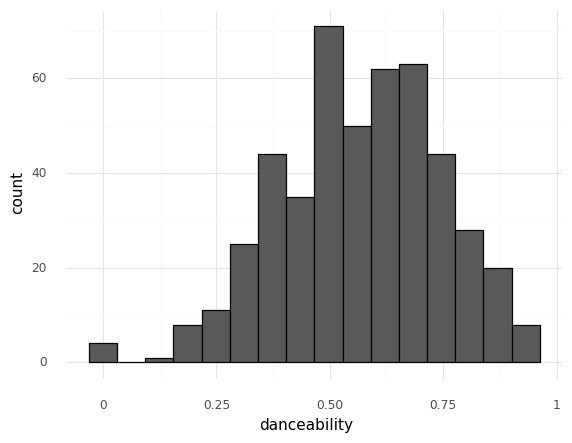

<ggplot: (8781261011213)>

In [65]:
(ggplot(b, aes(x='danceability')) + geom_histogram(color = 'black') + theme_minimal())

In [64]:
r2_score(y,dance_pred)

0.5994967241704979

### Prediction

In [69]:
coefficients = pd.DataFrame({'Coef': BEY_Mod.coef_, 'Name': predictors})

coefficients = coefficients.append({'Coef': BEY_Mod.intercept_, 'Name': 'intercept'},
                                    ignore_index = True)

coefficients

,Coef,Name
0,-0.034829,energy
1,-0.001462,key
2,0.022993,loudness
3,-0.000301,speechiness
4,-0.068482,acousticness
5,-0.007033,instrumentalness
6,-0.029896,liveness
7,0.091860,valence
8,0.575213,intercept
